In [1]:
# pip install yfinance

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [2]:
import yfinance as yf

In [3]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [4]:
stock="GOOG"
google_data=yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [5]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-10-28,4.649572,4.841602,4.622673,4.814454,4.802660,596097978
2004-10-29,4.953682,4.980083,4.747206,4.748203,4.736570,849672890
2004-11-01,4.820681,4.923296,4.763894,4.882449,4.870488,490828877
2004-11-02,4.950943,4.962649,4.815451,4.853558,4.841668,455553149
2004-11-03,4.935999,5.021179,4.750942,4.773856,4.762161,557630330


In [6]:
google_data.shape

(5034, 6)

In [7]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03
mean,47.148467,47.643333,46.677363,47.167367,47.057111,1.124972e+08
std,45.045366,45.536858,44.603198,45.071440,44.975314,1.458924e+08
min,4.096396,4.221676,4.017691,4.112087,4.102013,1.584340e+05
25%,13.214406,13.362414,13.078790,13.204382,13.172034,2.677450e+07
50%,27.690227,27.824858,27.360880,27.669035,27.601252,5.238983e+07
75%,62.045251,62.532250,61.587499,62.085625,61.933527,1.372867e+08
max,191.750000,193.309998,190.619995,192.660004,192.406723,1.650833e+09


In [8]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5034 entries, 2004-10-28 to 2024-10-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5034 non-null   float64
 1   High       5034 non-null   float64
 2   Low        5034 non-null   float64
 3   Close      5034 non-null   float64
 4   Adj Close  5034 non-null   float64
 5   Volume     5034 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.3 KB


In [9]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

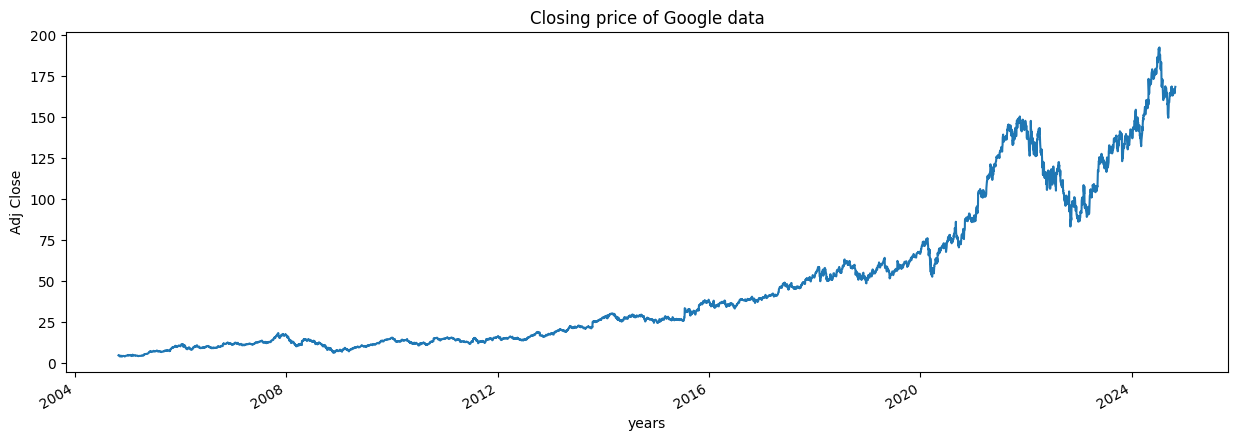

In [11]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [12]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    

In [13]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

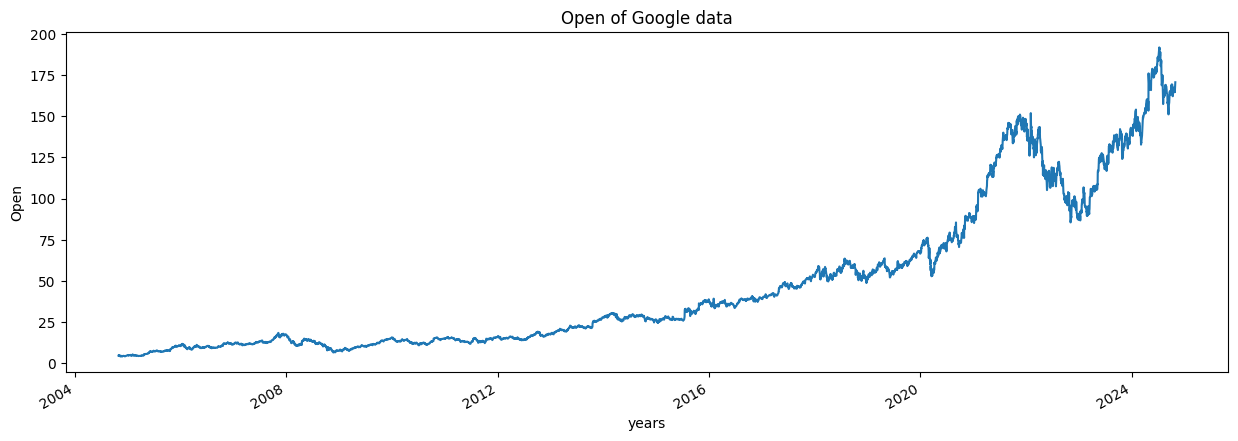

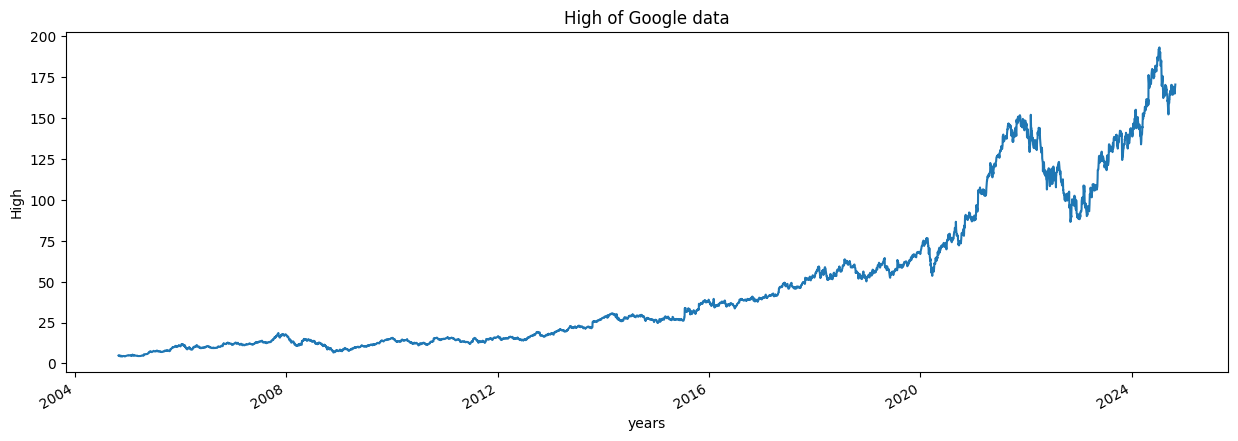

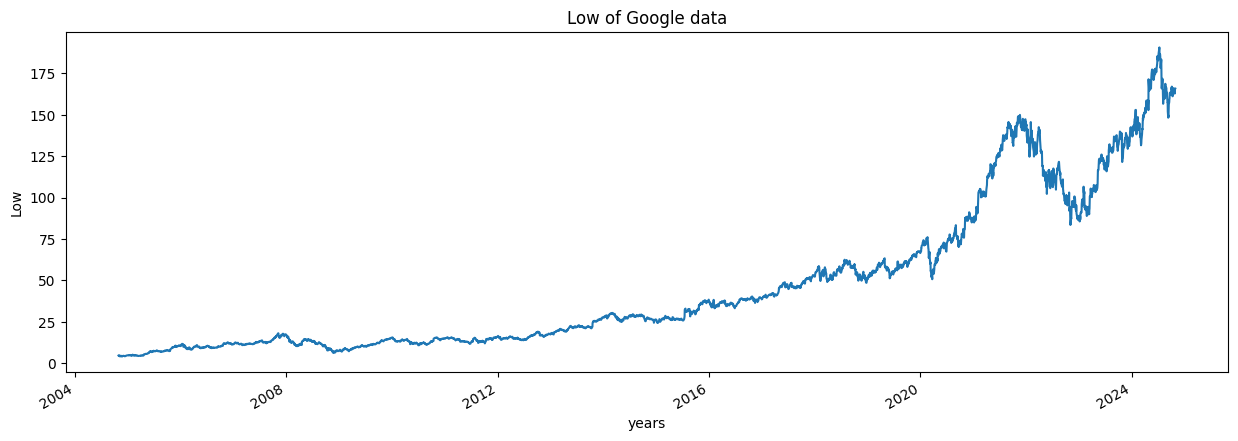

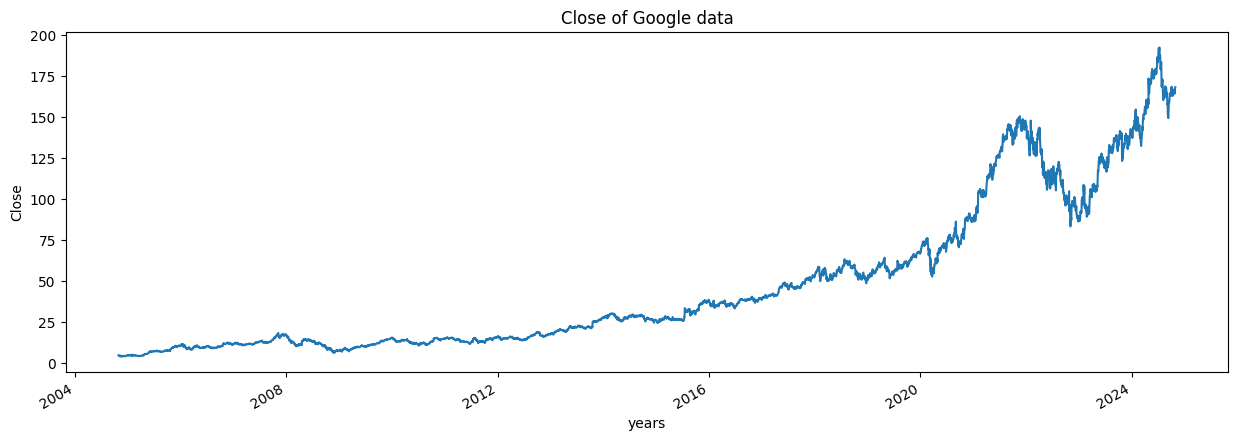

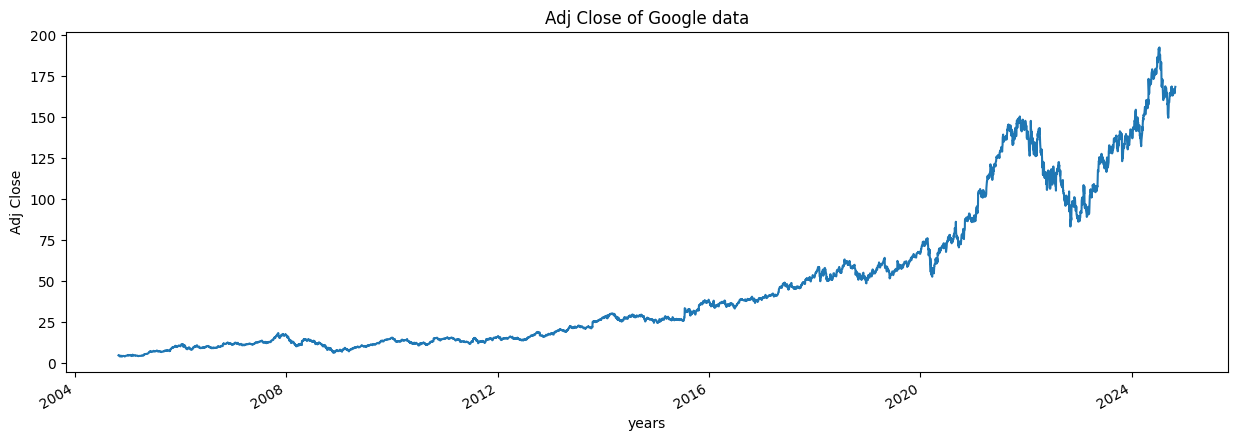

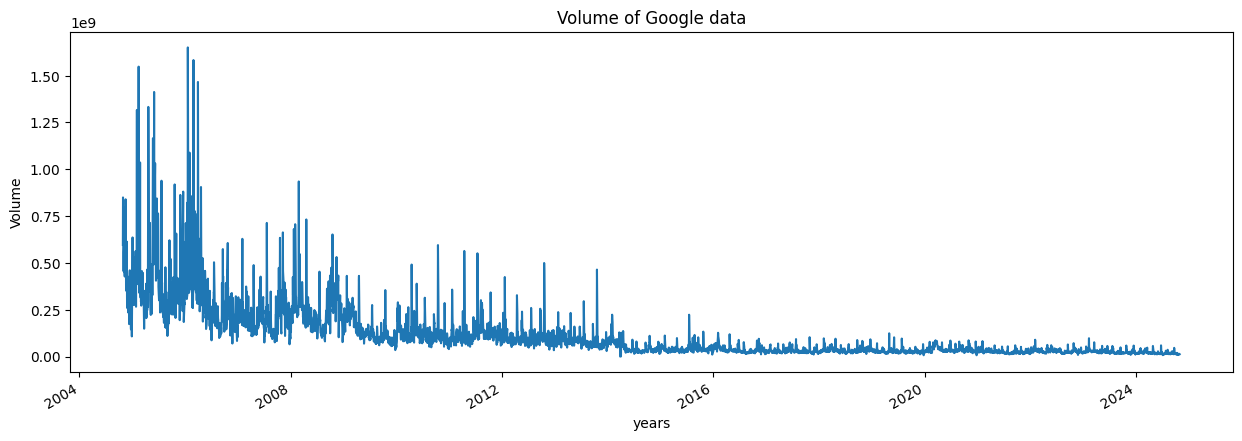

In [14]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [15]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [16]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [17]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [18]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [19]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 45
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 208


In [20]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [21]:
google_data['MA_for_250_days'][0:250].tail()

Date
2005-10-18         NaN
2005-10-19         NaN
2005-10-20         NaN
2005-10-21         NaN
2005-10-24    5.877484
Name: MA_for_250_days, dtype: float64

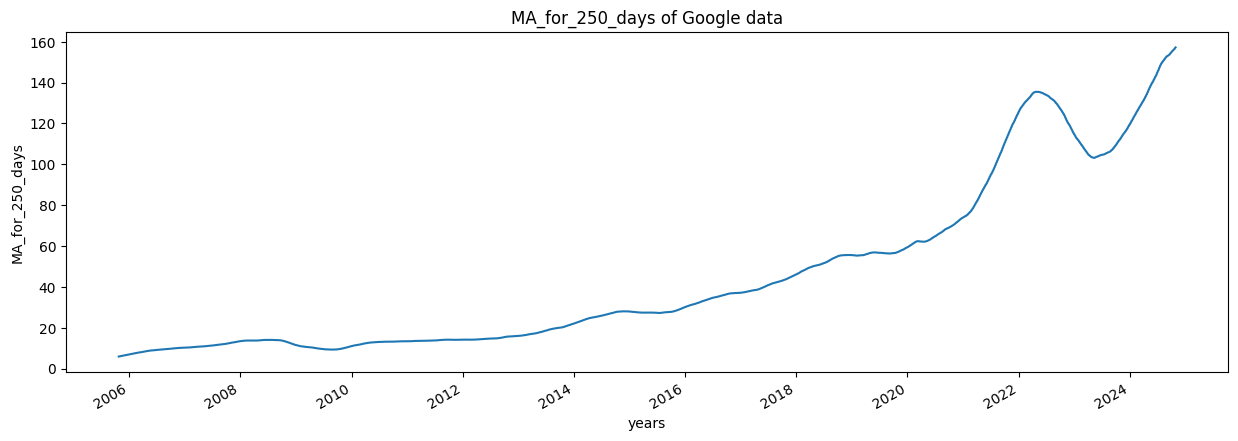

In [22]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

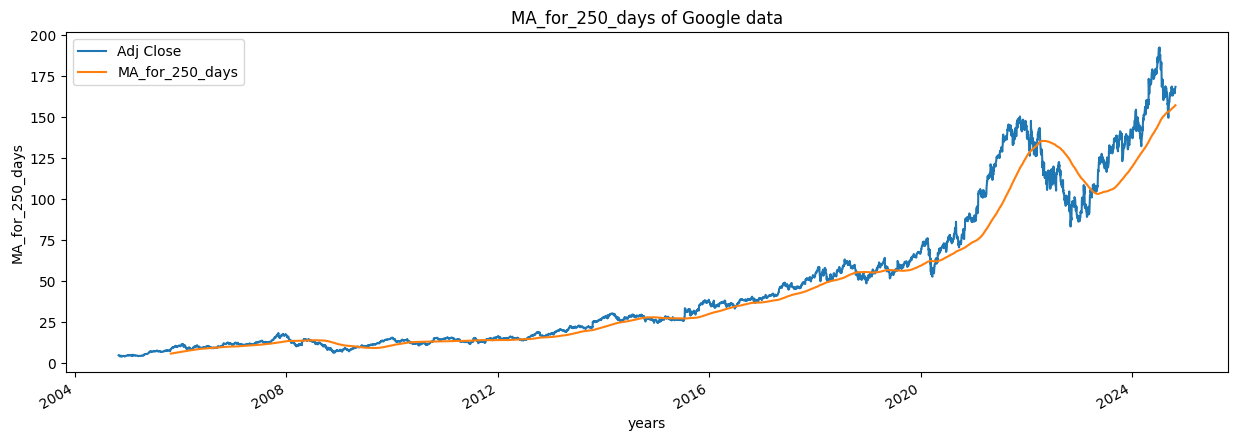

In [23]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

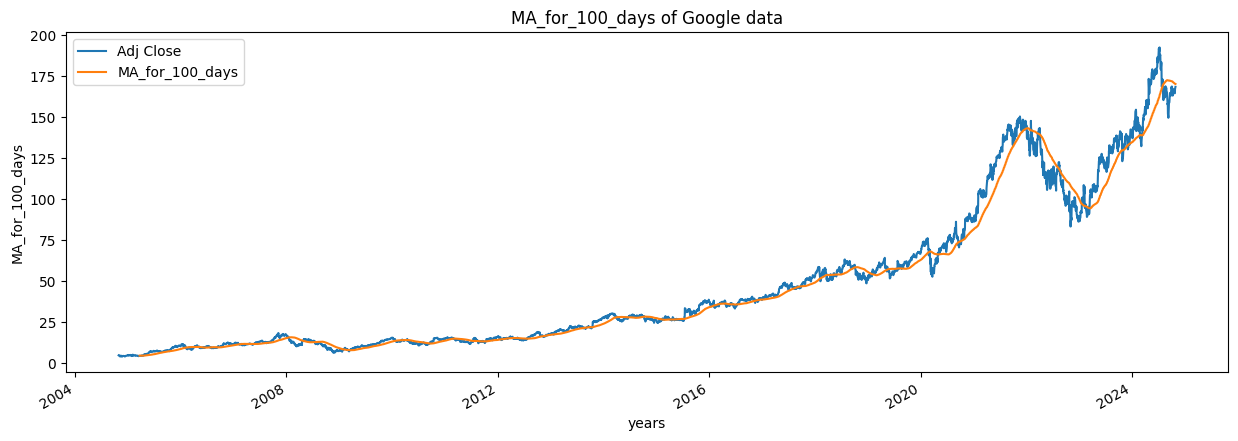

In [24]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

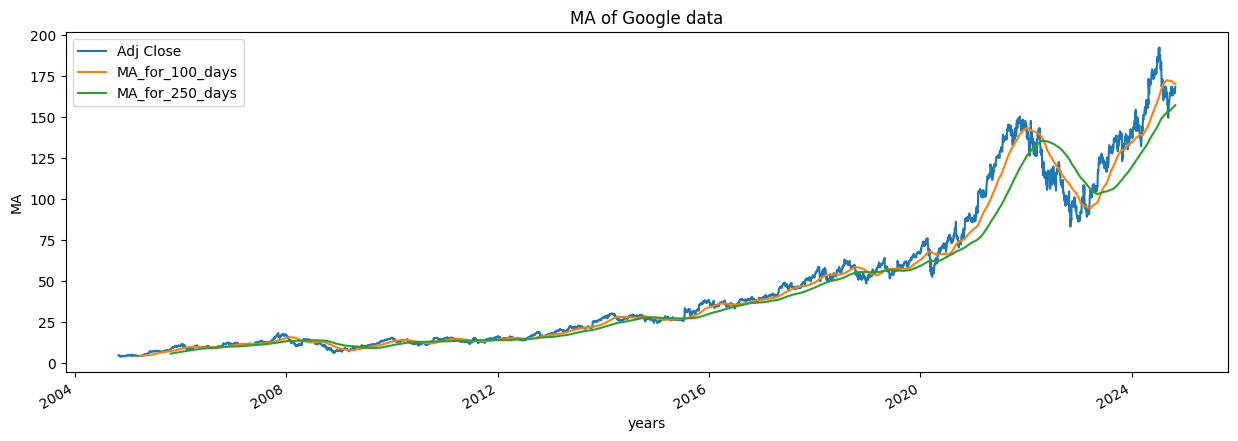

In [25]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [26]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-10-28,4.802660,NaN
2004-10-29,4.736570,-0.013761
2004-11-01,4.870488,0.028273
2004-11-02,4.841668,-0.005917
2004-11-03,4.762161,-0.016421


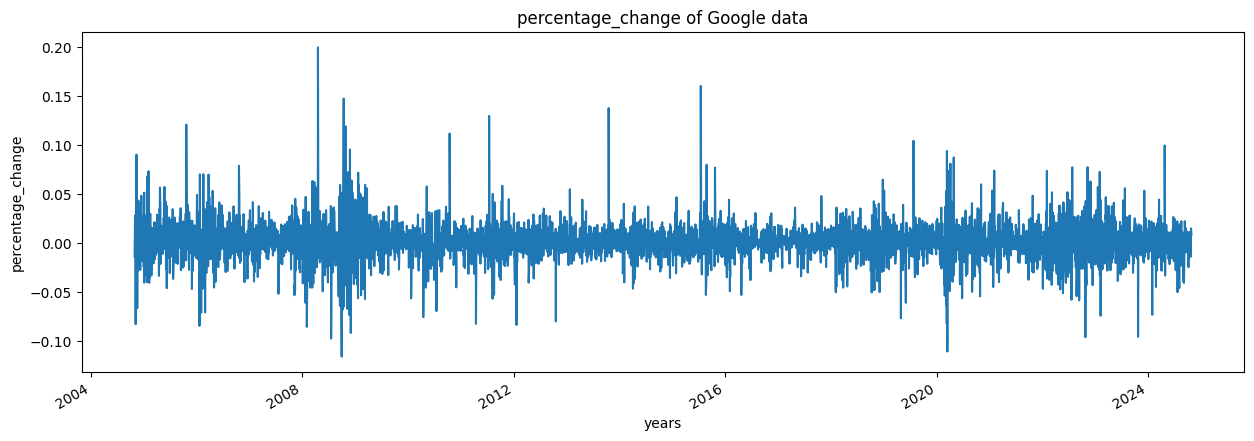

In [27]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [28]:
Adj_close_price = google_data[['Adj Close']]

In [29]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([192.40672302]), array([4.10201311]))

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00372081],
       [0.00336984],
       [0.00408102],
       ...,
       [0.8519595 ],
       [0.86502346],
       [0.87251127]])

In [31]:
len(scaled_data)

5034

In [32]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [33]:
x_data[0],y_data[0]

(array([[0.00372081],
        [0.00336984],
        [0.00408102],
        [0.00392797],
        [0.00350574],
        [0.0025861 ],
        [0.00056076],
        [0.00098298],
        [0.000475  ],
        [0.00036416],
        [0.00236443],
        [0.00222985],
        [0.00260853],
        [0.00098166],
        [0.00097638],
        [0.00032194],
        [0.00056736],
        [0.        ],
        [0.0003193 ],
        [0.00127457],
        [0.00188548],
        [0.0021045 ],
        [0.00222721],
        [0.00196069],
        [0.0018868 ],
        [0.00201874],
        [0.00147645],
        [0.0008352 ],
        [0.00064388],
        [0.00109909],
        [0.00086423],
        [0.0007059 ],
        [0.00179312],
        [0.00193693],
        [0.0015002 ],
        [0.00197651],
        [0.00262832],
        [0.00246075],
        [0.00279721],
        [0.00300831],
        [0.00353741],
        [0.00364957],
        [0.00366804],
        [0.00428817],
        [0.00365352],
        [0

In [34]:

int(len(x_data)*0.7)

3453

In [35]:
4908-100-int(len(x_data)*0.7)

1355

In [36]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3453, 100, 1)
(3453, 1)
(1481, 100, 1)
(1481, 1)


In [38]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [63]:
lstm_model = Sequential()
lstm_model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
lstm_model.add(LSTM(64,return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))

C:\Users\saite\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [64]:
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

In [65]:
lstm_model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 313s 88ms/step - loss: 1.7876e-04
Epoch 2/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 306s 89ms/step - loss: 4.5691e-05


In [66]:
lstm_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [67]:
predictions = lstm_model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step


In [68]:
predictions

array([[0.25382164],
       [0.2522385 ],
       [0.25378254],
       ...,
       [0.7877534 ],
       [0.78542215],
       [0.79092866]], dtype=float32)

In [69]:
inv_predictions_lstm = scaler.inverse_transform(predictions)
inv_predictions_lstm

array([[ 51.897823],
       [ 51.599712],
       [ 51.89046 ],
       ...,
       [152.43968 ],
       [152.0007  ],
       [153.0376  ]], dtype=float32)

In [70]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 51.85016632],
       [ 52.45867538],
       [ 53.05370712],
       ...,
       [164.52999878],
       [166.99000549],
       [168.3999939 ]])

In [71]:
rmse = np.sqrt(np.mean( (inv_predictions_lstm - inv_y_test)**2))

In [72]:
rmse

6.851641867896717

In [73]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate additional metrics
mae = mean_absolute_error(inv_y_test, inv_predictions_lstm)
r2 = r2_score(inv_y_test, inv_predictions_lstm)

# Print all metrics
print(f'RMSE: {rmse}')
print(f'MSE: {rmse**2}')  # MSE is RMSE squared
print(f'MAE: {mae}')
print(f'R²: {r2}')


RMSE: 6.851641867896717
MSE: 46.94499628591522
MAE: 5.199725370645362
R²: 0.9640905753026472


In [74]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions_lstm.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2018-12-10,51.850166,51.897823
2018-12-11,52.458675,51.599712
2018-12-12,53.053707,51.890461
2018-12-13,52.964928,52.453449
2018-12-14,51.977352,52.727203


<Figure size 640x480 with 0 Axes>

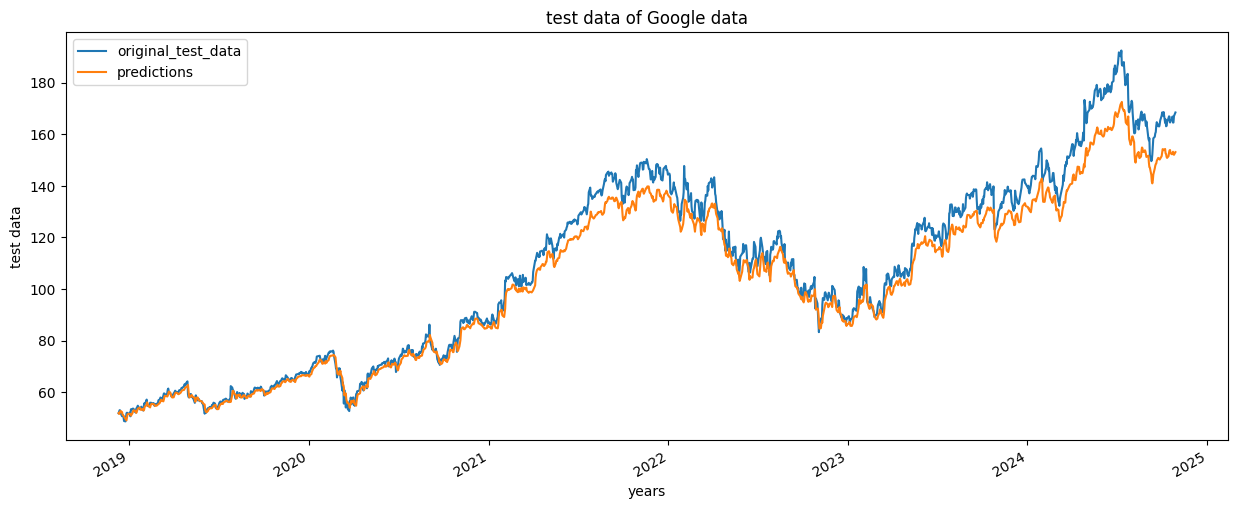

In [75]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

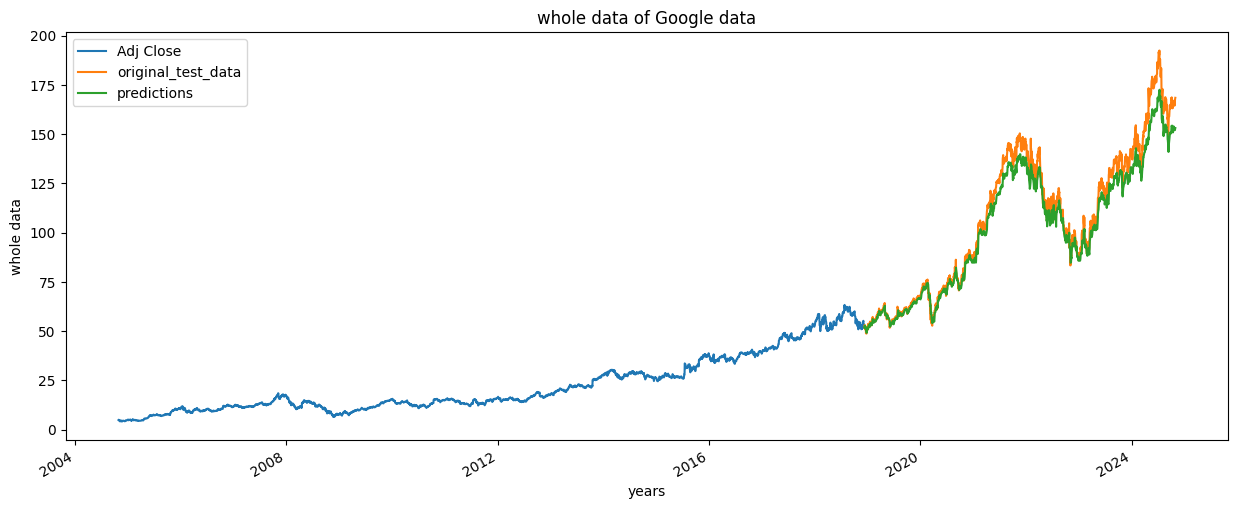

In [76]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [77]:
# model.save("Latest_stock_price_model.keras")

In [78]:
from tensorflow.keras.layers import SimpleRNN


In [79]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
rnn_model.add(SimpleRNN(64, return_sequences=False))
rnn_model.add(Dense(25))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mean_squared_error')


C:\Users\saite\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [80]:
rnn_model.fit(x_train, y_train, batch_size=1, epochs=2)
rnn_model.summary()


Epoch 1/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 243s 68ms/step - loss: 0.0026
Epoch 2/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 236s 68ms/step - loss: 4.3665e-05


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 100, 128)            │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,931 (359.11 KB)

 Trainable params: 30,643 (119.70 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,288 (239.41 KB)

In [81]:
predictions = rnn_model.predict(x_test)
inv_predictions_rnn = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)


47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step


In [82]:
rmse = np.sqrt(np.mean((inv_predictions_rnn - inv_y_test) ** 2))
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 3.7842335203586335


In [83]:
ploting_data = pd.DataFrame({
    'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions_rnn.reshape(-1)
}, index=google_data.index[splitting_len + 100:])


<Figure size 640x480 with 0 Axes>

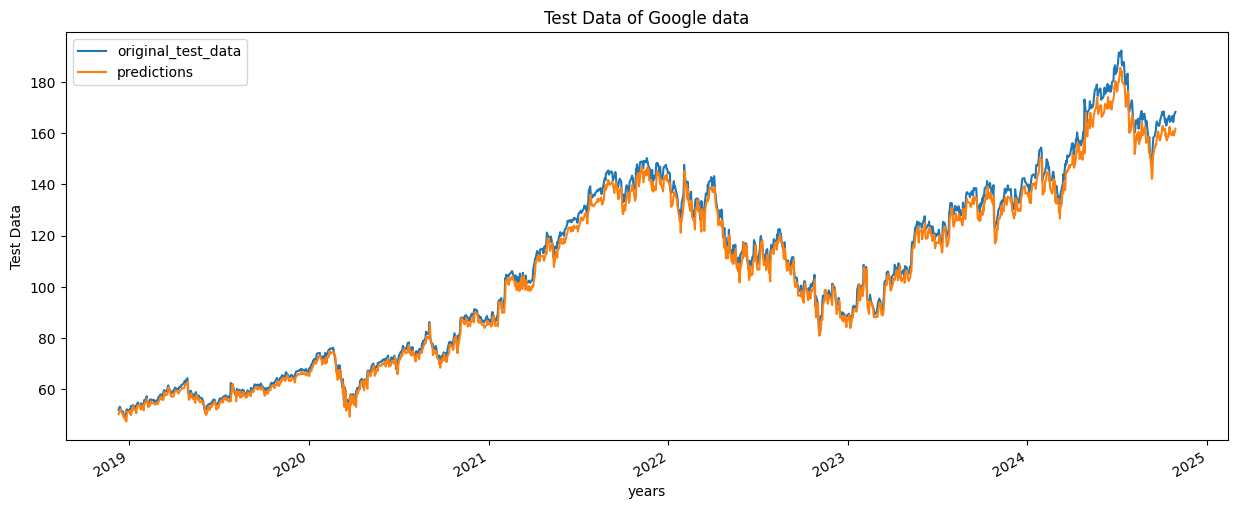

<Figure size 640x480 with 0 Axes>

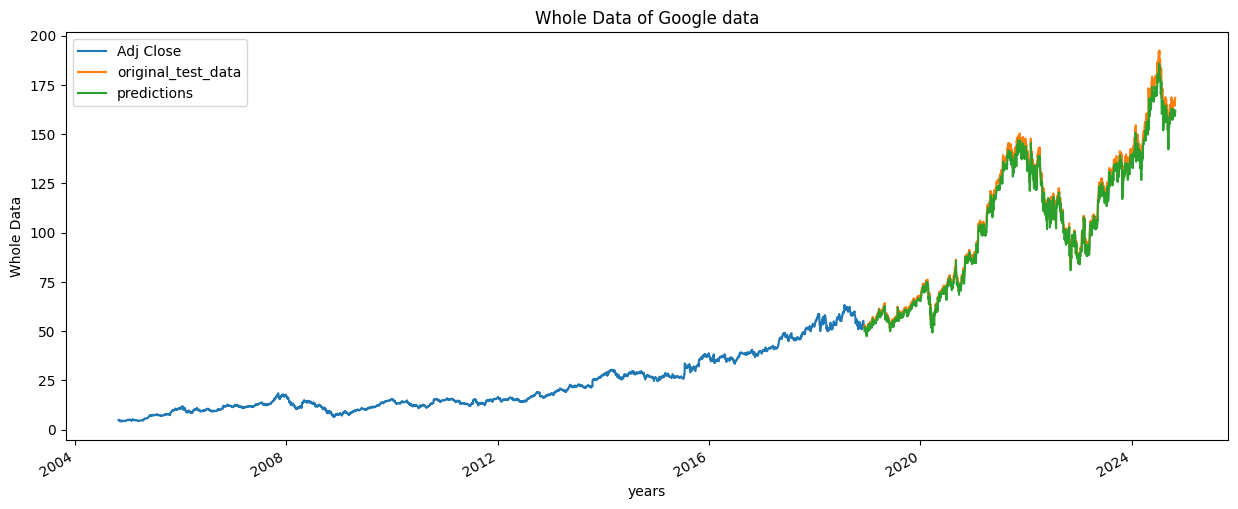

In [84]:

plot_graph((15, 6), ploting_data, 'Test Data')
plot_graph((15, 6), pd.concat([Adj_close_price[:splitting_len + 100], ploting_data], axis=0), 'Whole Data')


In [85]:
rnn_model.save("Latest_stock_price_rnn_model.keras")

In [86]:
import pandas as pd
comparison_df = pd.DataFrame({
    'Date': google_data.index[len(google_data) - len(inv_y_test):], 
    'Actual Price': inv_y_test.reshape(-1),  
    'LSTM Prediction': inv_predictions_lstm.reshape(-1), 
    'SimpleRNN Prediction': inv_predictions_rnn.reshape(-1)  
    'LSTM Absolute Error': lstm_absolute_error.reshape(-1),
    'SimpleRNN Absolute Error': rnn_absolute_error.reshape(-1)
})
comparison_df.to_csv('stock_predictions_comparison.csv', index=False)


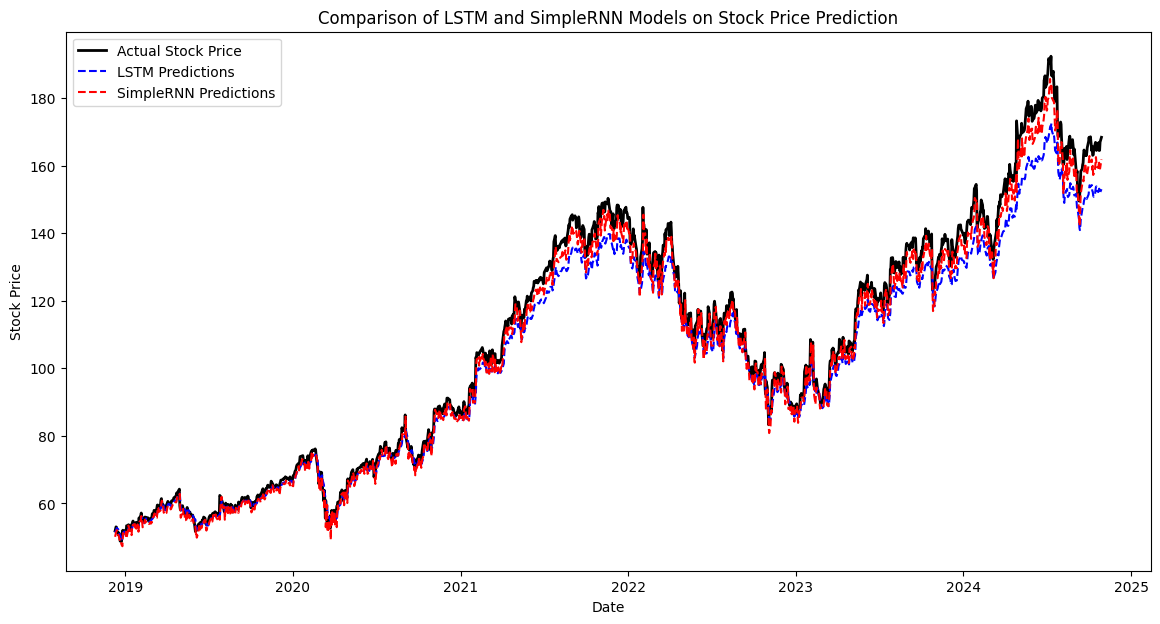

In [87]:
comparison_df = pd.DataFrame({
    'Actual': inv_y_test.reshape(-1), 
    'LSTM Predictions': inv_predictions_lstm.reshape(-1), 
    'SimpleRNN Predictions': inv_predictions_rnn.reshape(-1) 
}, index=google_data.index[len(google_data) - len(inv_y_test):])
plt.figure(figsize=(14, 7))
plt.plot(comparison_df['Actual'], label='Actual Stock Price', color='black', linewidth=2)
plt.plot(comparison_df['LSTM Predictions'], label='LSTM Predictions', color='blue', linestyle='dashed')
plt.plot(comparison_df['SimpleRNN Predictions'], label='SimpleRNN Predictions', color='red', linestyle='dashed')
plt.title('Comparison of LSTM and SimpleRNN Models on Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
